# Suicide Rate Prediction with Machine Learning

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
#Loading data into dataframe

data = pd.read_csv("suicide_data.csv")
data.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

## 2. Familiarizing with Data:
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Shape of dataframe

data.shape

(27820, 12)

In [4]:
#Listing the features of the dataset

data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
#Renaming the columns names for convinience

data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [6]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
data.age_group.value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age_group, dtype: int64

In [8]:
data.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [9]:
#Listing countries

country = data.country.unique()
print("Number of countries:", len(country))
country

Number of countries: 101


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'suicide_count'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'suicide_rate'}>],
       [<AxesSubplot:title={'center':'HDI for year'}>,
        <AxesSubplot:title={'center':'gdp_per_capita'}>]], dtype=object)

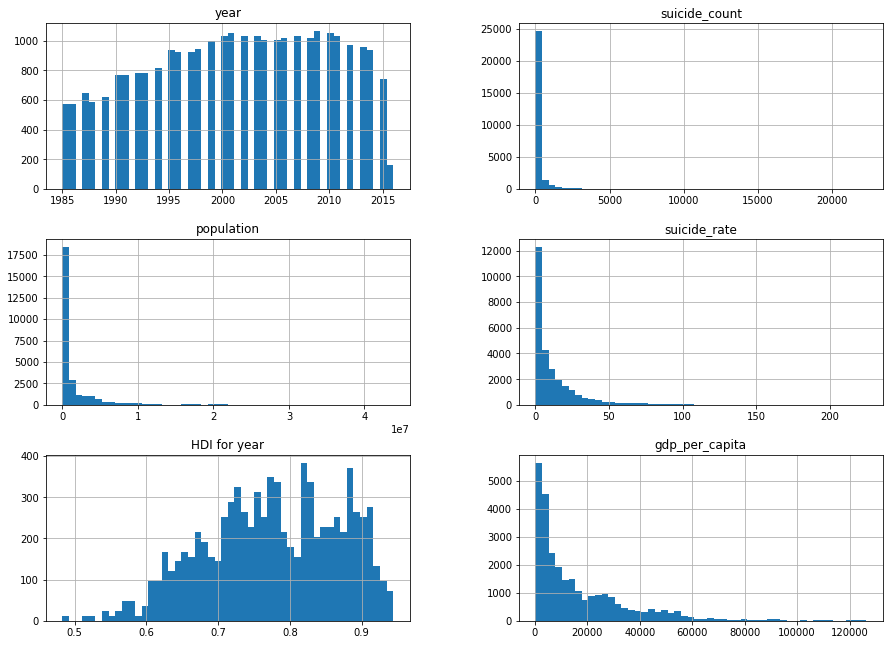

In [10]:
data.hist(bins = 50,figsize = (15,11))

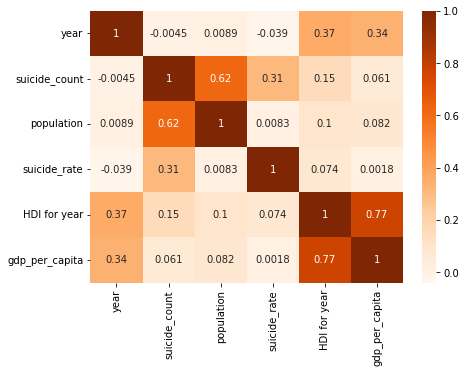

In [11]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')
plt.show()

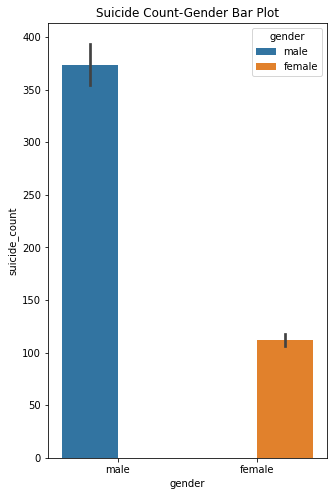

In [12]:
#Gender and suicide count bar plot

plt.figure(figsize=(5,8))
sns.barplot(x = "gender", y = "suicide_count", hue = "gender", data = data)
plt.title('Suicide Count-Gender Bar Plot')
plt.show()


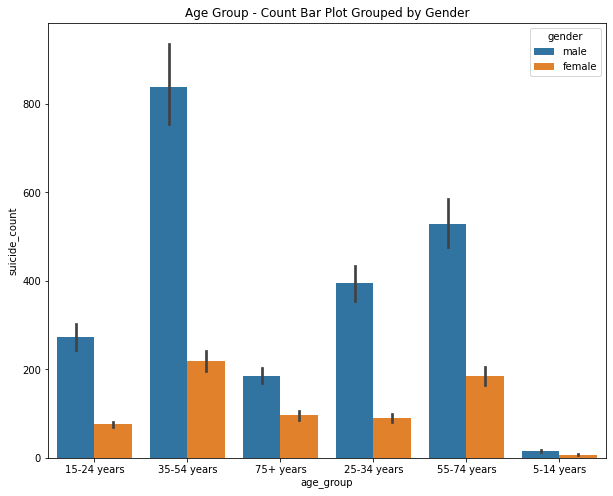

In [13]:
#Age Group - Count Bar Plot Grouped by Gender

plt.figure(figsize=(10,8))
sns.barplot(x = "age_group", y = "suicide_count", hue = "gender", data = data)
plt.title("Age Group - Count Bar Plot Grouped by Gender")
plt.show()

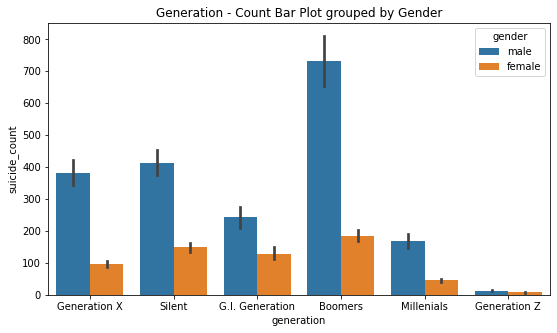

In [14]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicide_count", hue = "gender", data = data)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()

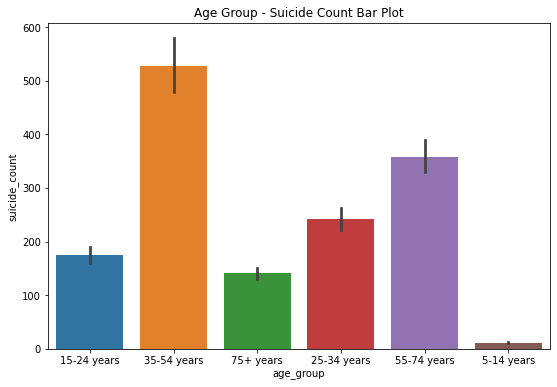

In [15]:
# Age Group and Suicide count bar plot

plt.figure(figsize=(9,6))
sns.barplot(x='age_group', y='suicide_count', data = data)
plt.title('Age Group - Suicide Count Bar Plot')
plt.show()

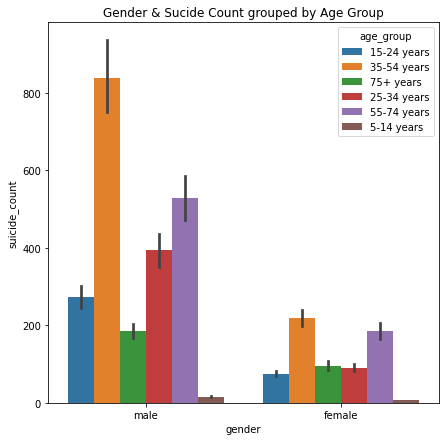

In [17]:
#Gender & Sucide Count grouped by Age Group bar plot

plt.figure(figsize=(7,7))
sns.barplot(x="gender", y="suicide_count", hue="age_group", data=data)
plt.title('Gender & Sucide Count grouped by Age Group')
plt.show()

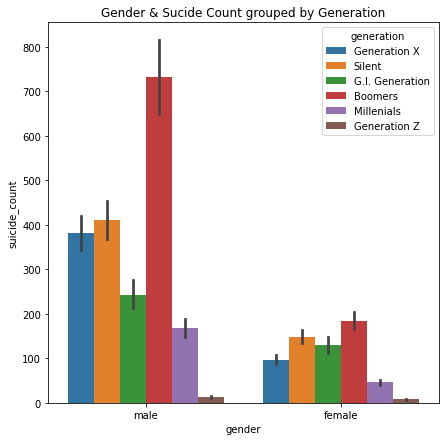

In [18]:
#Gender & Sucide Count grouped by Generation bar plot

plt.figure(figsize=(7,7))
sns.barplot(x="gender", y="suicide_count", hue="generation", data=data)
plt.title('Gender & Sucide Count grouped by Generation')
plt.show()


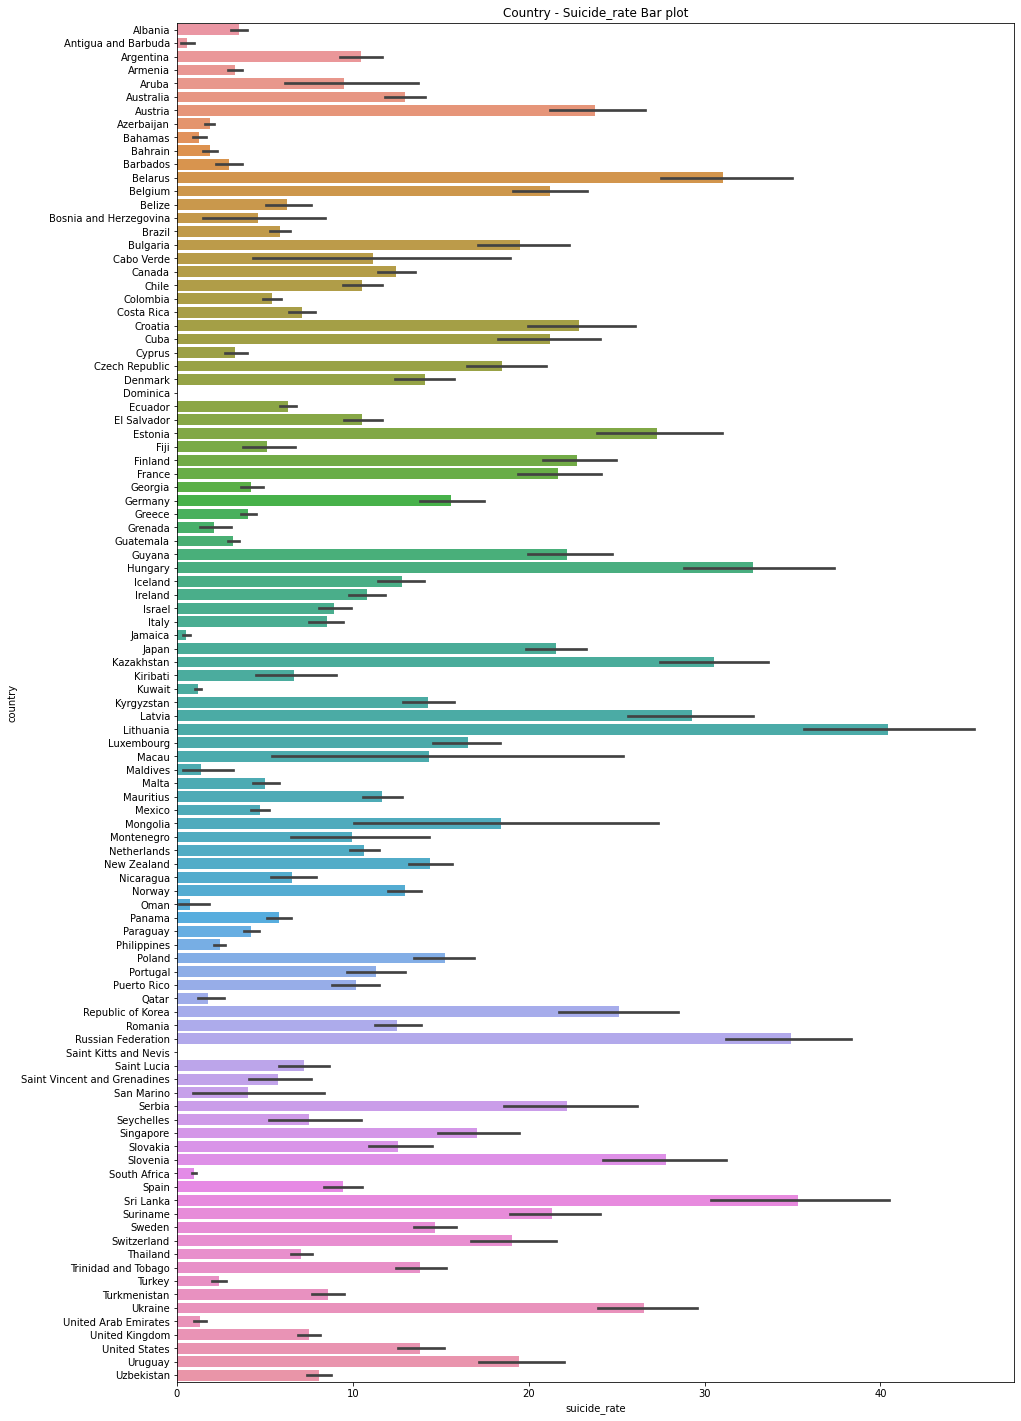

In [19]:
#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "suicide_rate", y = "country", data = data)
plt.title('Country - Suicide_rate Bar plot')
plt.show()

<AxesSubplot:xlabel='year'>

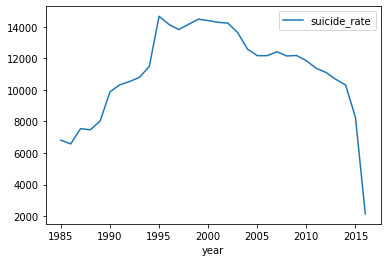

In [20]:
#Line plpot of year and suicide_rate

data[['year','suicide_rate']].groupby(['year']).sum().plot()

<Figure size 1440x720 with 0 Axes>

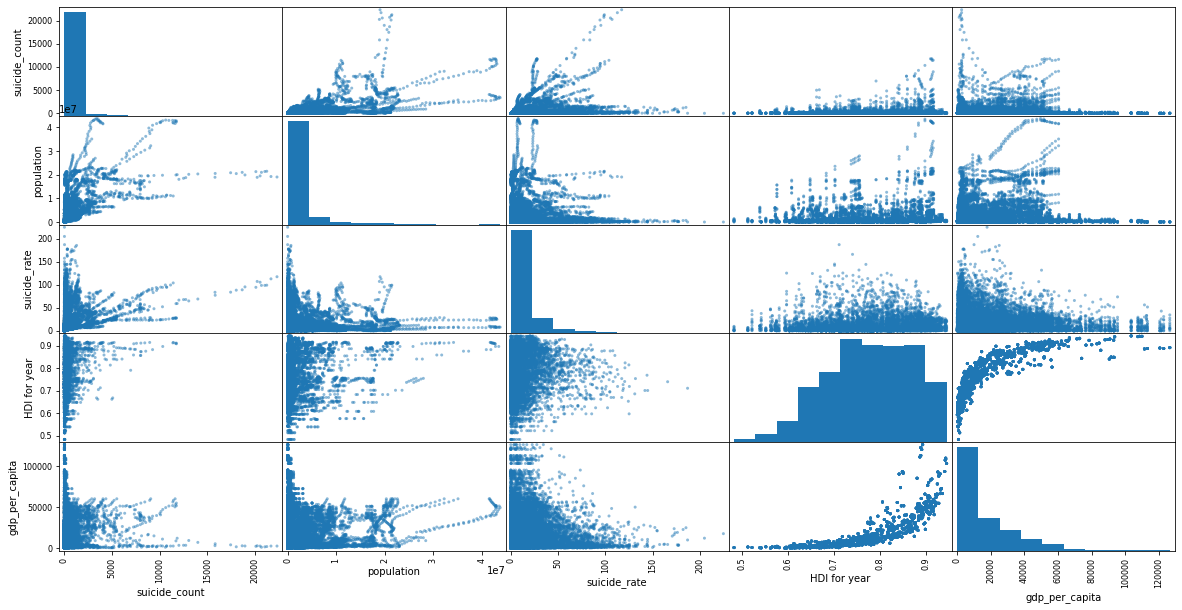

In [21]:
#Scatter matrix for checking outlier

plt.figure(figsize=(20,10))
attributes = ['suicide_count', 'population', 'suicide_rate','HDI for year', 
              'gdp_for_year','gdp_per_capita']
scatter_matrix(data[attributes], figsize=(20,10))
plt.show()


## 4. Data Preprocessing & EDA:
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [22]:
data.describe()

year  suicide_count    population  suicide_rate  HDI for year  \
count  27820.000000   27820.000000  2.782000e+04  27820.000000   8364.000000   
mean    2001.258375     242.574407  1.844794e+06     12.816097      0.776601   
std        8.469055     902.047917  3.911779e+06     18.961511      0.093367   
min     1985.000000       0.000000  2.780000e+02      0.000000      0.483000   
25%     1995.000000       3.000000  9.749850e+04      0.920000      0.713000   
50%     2002.000000      25.000000  4.301500e+05      5.990000      0.779000   
75%     2008.000000     131.000000  1.486143e+06     16.620000      0.855000   
max     2016.000000   22338.000000  4.380521e+07    224.970000      0.944000   

       gdp_per_capita  
count    27820.000000  
mean     16866.464414  
std      18887.576472  
min        251.000000  
25%       3447.000000  
50%       9372.000000  
75%      24874.000000  
max     126352.000000

In [23]:
# checking info of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


From data.info we come to know that there are null value in HDI for year

In [24]:
##checking the data for unique values

data.nunique()

country             101
year                 32
gender                2
age_group             6
suicide_count      2084
population        25564
suicide_rate       5298
country-year       2321
HDI for year        305
gdp_for_year       2321
gdp_per_capita     2233
generation            6
dtype: int64

In [25]:
#checking the data for null or missing values

data.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [26]:
#dropping the HDI for year column

data = data.drop(['HDI for year'], axis = 1)
data.shape


(27820, 11)

In [27]:
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

The column country-year is just a combination of country and year columns. So dropping that column.

In [28]:
#dropping the country-year for year column

data = data.drop(['country-year'], axis = 1)
data.shape

(27820, 10)

Now we are going further with 10 features which also include the target column. For further assurance, lets drop all the null rows from the dataset.

In [29]:
#droppinf off any null rows (is any)

data = data.dropna()
data.shape

(27820, 10)

In [30]:
#checking for outlier and removing it

data=data.sort_values(by=["suicide_rate"])
q1=data["suicide_rate"].quantile(0.25)
q3=data["suicide_rate"].quantile(0.75)
iqr=q3-q1
lwo=q1-1.5*iqr
upo=q3+1.5*iqr
data=data[(data.suicide_rate<upo)&(data.suicide_rate>lwo)]
data=data.sort_index().reset_index(drop=True)
data.shape

(25774, 10)

In [31]:
#creating a copy of dataset for statistical test
stat_data = data.copy()
stat_data

country  year  gender    age_group  suicide_count  population  \
0         Albania  1987    male  15-24 years             21      312900   
1         Albania  1987    male  35-54 years             16      308000   
2         Albania  1987  female  15-24 years             14      289700   
3         Albania  1987    male    75+ years              1       21800   
4         Albania  1987    male  25-34 years              9      274300   
...           ...   ...     ...          ...            ...         ...   
25769  Uzbekistan  2014  female  35-54 years            107     3620833   
25770  Uzbekistan  2014  female    75+ years              9      348465   
25771  Uzbekistan  2014    male   5-14 years             60     2762158   
25772  Uzbekistan  2014  female   5-14 years             44     2631600   
25773  Uzbekistan  2014  female  55-74 years             21     1438935   

       suicide_rate    gdp_for_year  gdp_per_capita       generation  
0              6.71   2,156,624,900             796     Generation X  
1              5.19   2,156,624,900             796           Silent  
2              4.83   2,156,624,900             796     Generation X  
3              4.59   2,156,624,900             796  G.I. Generation  
4              3.28   2,156,624,900             796          Boomers  
...             ...             ...             ...              ...  
25769          2.96  63,067,077,179            2309     Generation X  
25770          2.58  63,067,077,179            2309           Silent  
25771          2.17  63,067,077,179            2309     Generation Z  
25772          1.67  63,067,077,179            2309     Generation Z  
25773          1.46  63,067,077,179            2309          Boomers  

[25774 rows x 10 columns]

The non-numerical labeled columns, country, year, gender, age_group and generation are to be converted to numerical labels that can be done by using SkLearn's LabelEncoder.

In [32]:
#encoding the categorical features with LabelEncoder

from sklearn.preprocessing import LabelEncoder
import pickle
file = open('pickle/label.pkl', 'wb')
categorical = ['country','year','age_group', 'gender', 'generation']
dict= {}

for column in categorical:
    le = LabelEncoder()
    le.fit(stat_data[column])
    # dump information to that file
    dict[column] = le
    stat_data[column] = le.transform(stat_data[column])
pickle.dump(dict, file)
file.close()

In [33]:
#opening pickled file

file = open('pickle/label.pkl', "rb")
label = pickle.load(file)
label

{'country': LabelEncoder(),
 'year': LabelEncoder(),
 'age_group': LabelEncoder(),
 'gender': LabelEncoder(),
 'generation': LabelEncoder()}

In [34]:
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25774 entries, 0 to 25773
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         25774 non-null  int32  
 1   year            25774 non-null  int64  
 2   gender          25774 non-null  int32  
 3   age_group       25774 non-null  int32  
 4   suicide_count   25774 non-null  int64  
 5   population      25774 non-null  int64  
 6   suicide_rate    25774 non-null  float64
 7   gdp_for_year    25774 non-null  object 
 8   gdp_per_capita  25774 non-null  int64  
 9   generation      25774 non-null  int32  
dtypes: float64(1), int32(4), int64(4), object(1)
memory usage: 1.6+ MB


In [35]:
#Checking the data type of each column

stat_data.dtypes

country             int32
year                int64
gender              int32
age_group           int32
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation          int32
dtype: object

In [36]:
# Converting the column 'gdp_for_year' to float from object

stat_data['gdp_for_year'] = stat_data['gdp_for_year'].str.replace(',','').astype(float)

In [37]:
#description of dataset

stat_data.describe().T

count          mean           std         min           25%  \
country         25774.0  4.900237e+01  2.949350e+01         0.0  2.300000e+01   
year            25774.0  1.630973e+01  8.505488e+00         0.0  1.000000e+01   
gender          25774.0  4.630636e-01  4.986435e-01         0.0  0.000000e+00   
age_group       25774.0  2.408318e+00  1.682575e+00         0.0  1.000000e+00   
suicide_count   25774.0  1.777423e+02  5.933664e+02         0.0  2.000000e+00   
population      25774.0  1.854543e+06  3.934928e+06       278.0  9.704875e+04   
suicide_rate    25774.0  8.547500e+00  9.613651e+00         0.0  7.100000e-01   
gdp_for_year    25774.0  4.475355e+11  1.477638e+12  46919625.0  8.680472e+09   
gdp_per_capita  25774.0  1.710801e+04  1.914534e+04       251.0  3.492000e+03   
generation      25774.0  2.705207e+00  1.787342e+00         0.0  1.000000e+00   

                         50%           75%           max  
country         4.700000e+01  7.400000e+01  1.000000e+02  
year            1.700000e+01  2.400000e+01  3.100000e+01  
gender          0.000000e+00  1.000000e+00  1.000000e+00  
age_group       2.000000e+00  4.000000e+00  5.000000e+00  
suicide_count   2.000000e+01  1.050000e+02  1.176700e+04  
population      4.411165e+05  1.507493e+06  4.380521e+07  
suicide_rate    4.990000e+00  1.328000e+01  4.016000e+01  
gdp_for_year    4.811469e+10  2.620076e+11  1.812071e+13  
gdp_per_capita  9.456000e+03  2.519100e+04  1.263520e+05  
generation      2.000000e+00  4.000000e+00  5.000000e+00

In [38]:
#Scaling the numerical data columns with RobustScalar

numerical = ['suicide_count', 'population', 'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
stat_data[numerical] = rc.fit_transform(stat_data[numerical])


In [39]:
import pickle
pickle.dump(rc, open('pickle/robust.pkl', "wb"))

In [40]:
# Sepratating & assigning features and target columns to X & y

y = stat_data['suicide_rate']
X = stat_data.drop('suicide_rate',axis=1)
X.shape, y.shape

((25774, 9), (25774,))

In [41]:
stat_data

country  year  gender  age_group  suicide_count  population  \
0            0     2       1          0       0.009709   -0.090905   
1            0     2       1          2      -0.038835   -0.094379   
2            0     2       0          0      -0.058252   -0.107354   
3            0     2       1          5      -0.184466   -0.297294   
4            0     2       1          1      -0.106796   -0.118272   
...        ...   ...     ...        ...            ...         ...   
25769      100    29       0          2       0.844660    2.254407   
25770      100    29       0          5      -0.106796   -0.065690   
25771      100    29       1          3       0.388350    1.645610   
25772      100    29       0          3       0.233010    1.553045   
25773      100    29       0          4       0.009709    0.707450   

       suicide_rate  gdp_for_year  gdp_per_capita  generation  
0              6.71     -0.181418       -0.399097           2  
1              5.19     -0.181418       -0.399097           5  
2              4.83     -0.181418       -0.399097           2  
3              4.59     -0.181418       -0.399097           1  
4              3.28     -0.181418       -0.399097           0  
...             ...           ...             ...         ...  
25769          2.96      0.059024       -0.329370           2  
25770          2.58      0.059024       -0.329370           5  
25771          2.17      0.059024       -0.329370           3  
25772          1.67      0.059024       -0.329370           3  
25773          1.46      0.059024       -0.329370           0  

[25774 rows x 10 columns]

## 5. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [42]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((20619, 9), (5155, 9))

In [43]:
#importing required libraries 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [44]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))

In [45]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

#### Performance Evaluation:

In [47]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.284
Linear Regression: Accuracy on test Data: 0.274

Linear Regression: The RMSE of the training set is: 8.17862820769805
Linear Regression: The RMSE of the testing set is: 8.005812687898015


#### Storing Results:

In [48]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)

Text(0.5, 1.0, 'Actual vs Predicted Training Set')

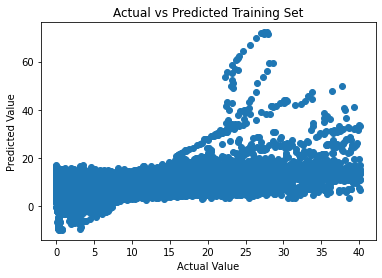

In [49]:
plt.scatter(y_train,y_train_lr)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Training Set")

Text(0.5, 1.0, 'Actual vs Predicted Testing Set')

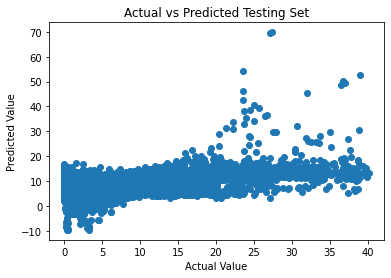

In [50]:
plt.scatter(y_test,y_test_lr)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Testing Set")

#### OBSERVATIONS: 
   The model preformance is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting.



In [51]:
# Decision Tree regression model 
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [52]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#### Performance Evaluation:

In [53]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.976
Decision Tree: Accuracy on test Data: 0.969

Decision Tree: The RMSE of the training set is: 1.49820960521051
Decision Tree: The RMSE of the testing set is: 1.6534005098065445


#### Storing Results:

In [54]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree',acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

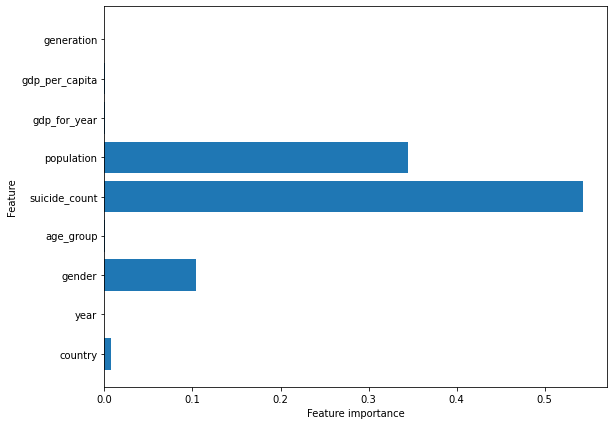

In [55]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

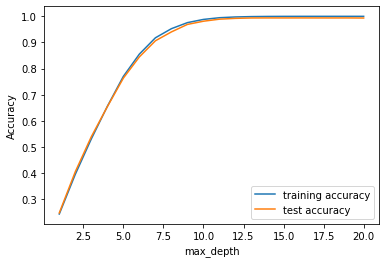

In [56]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(tree.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

#### OBSERVATIONS:

Decision tree is better than other regression model as it gives 96.9% accuracy, also as max depth increases accuracy of model increases.

In [57]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model 
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [58]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

#### Performance Evaluation:

In [59]:
#computing the accuracy of the model performance
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)

Random Forest: Accuracy on training Data: 0.991
Random Forest: Accuracy on test Data: 0.988

Random Forest: The RMSE of the training set is:  0.9027274531122871
Random Forest: The RMSE of the testing set is:  1.0411924254361657


#### Storing Results:

In [60]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest',acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

Evaluating training and testing set performance with different numbers of max_depth from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of max_depth on the x-axis.

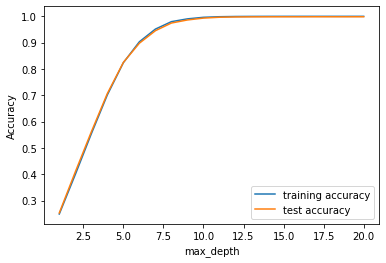

In [61]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  forest = RandomForestRegressor(max_depth=n)
  forest.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(forest.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

#### OBSERVATIONS:

In [62]:
# Gradient Boosted Regression Trees model
from sklearn.ensemble import GradientBoostingRegressor

# instantiate the model
gbrt = GradientBoostingRegressor(learning_rate=0.5)

# fit the model 
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5)

In [63]:
#predicting the target value from the model for the samples
y_test_gbrt = gbrt.predict(X_test)
y_train_gbrt = gbrt.predict(X_train)

#### Performance Evaluation:

In [64]:
#computing the accuracy of the model performance
acc_train_gbrt = gbrt.score(X_train, y_train)
acc_test_gbrt = gbrt.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_gbrt = np.sqrt(mean_squared_error(y_train, y_train_gbrt))
rmse_test_gbrt = np.sqrt(mean_squared_error(y_test, y_test_gbrt))

print("Gradient Boosted Regression Trees: Accuracy on training Data: {:.3f}".format(acc_train_gbrt))
print("Gradient Boosted Regression Trees: Accuracy on test Data: {:.3f}".format(acc_test_gbrt))
print('\nGradient Boosted Regression Trees: The RMSE of the training set is: ', rmse_train_gbrt)
print('Gradient Boosted Regression Trees: The RMSE of the testing set is: ', rmse_test_gbrt)

Gradient Boosted Regression Trees: Accuracy on training Data: 0.991
Gradient Boosted Regression Trees: Accuracy on test Data: 0.988

Gradient Boosted Regression Trees: The RMSE of the training set is:  0.9247908152749489
Gradient Boosted Regression Trees: The RMSE of the testing set is:  1.030708206712871


#### Storing Results:

In [65]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Gradient Boosted Regression',acc_train_gbrt, acc_test_gbrt, rmse_train_gbrt, rmse_test_gbrt)

Evaluating training and testing set performance with different numbers of learning_rate from 0.1 to 0.9. The plot shows the training and test set accuracy on the y-axis against the setting of learning_rate on the x-axis.

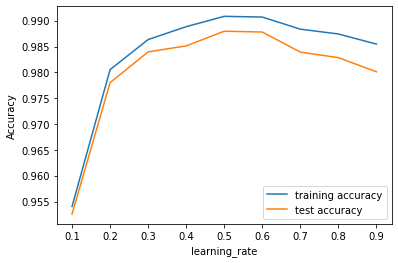

In [66]:
training_accuracy = []
test_accuracy = []
r = []
# try learning_rate from 0.1 to 0.9
rate = range(1, 10)
for n in rate:
  # fit the model
  gbrt = GradientBoostingRegressor(learning_rate=n*0.1)
  gbrt.fit(X_train, y_train)
  r.append(n*0.1)
  # record training set accuracy
  training_accuracy.append(gbrt.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(gbrt.score(X_test, y_test))

#plotting the training & testing accuracy for learning_rate from 0.1 to 0.9
plt.plot(r, training_accuracy, label="training accuracy")
plt.plot(r, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend()

In [67]:
# KNN Regression model
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model 
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [68]:
#Checking the best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)

{'n_neighbors': 2, 'weights': 'distance'}


In [69]:
#predicting the target value from the model for the samples
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

#### Performance Evaluation:

In [70]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.732

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 4.862355277515545


#### Storing Results:

In [71]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('k-Nearest Neighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

Evaluating training and testing set performance with different numbers of neighbors from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis.

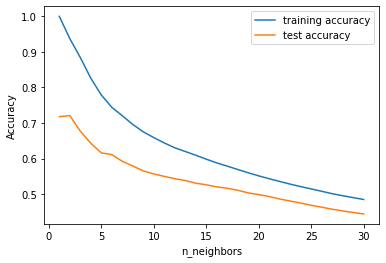

In [72]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 31)
for n in neighbors_settings:
  # fit the model
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(knn.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

In [73]:
#Bagging Regression model
from sklearn.ensemble import BaggingRegressor

#instantiate the model
br = BaggingRegressor(n_estimators=10)

#fit the model
br.fit(X_train, y_train)

BaggingRegressor()

In [74]:
#predicting the target value from the model for the samples
y_test_br = br.predict(X_test)
y_train_br = br.predict(X_train)

#### Performance Evaluation:

In [75]:
#computing the accuracy of the model performance
acc_train_br = br.score(X_train, y_train)
acc_test_br = br.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_br = np.sqrt(mean_squared_error(y_train, y_train_br))
rmse_test_br = np.sqrt(mean_squared_error(y_test, y_test_br))

print("Bagging Regression: Accuracy on training Data: {:.3f}".format(acc_train_br))
print("Bagging Regression: Accuracy on test Data: {:.3f}".format(acc_test_br))
print('\nBagging Regression: The RMSE of the training set is: ', rmse_train_br)
print('Bagging Regression: The RMSE of the testing set is: ', rmse_test_br)

Bagging Regression: Accuracy on training Data: 0.999
Bagging Regression: Accuracy on test Data: 0.997

Bagging Regression: The RMSE of the training set is:  0.24040299494931508
Bagging Regression: The RMSE of the testing set is:  0.4780828791948562


#### Storing Results:

In [76]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Bagging Regression',acc_train_br, acc_test_br, rmse_train_br, rmse_test_br)


Evaluating training and testing set performance with different numbers of n_estimators from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of n_estimators on the x-axis.

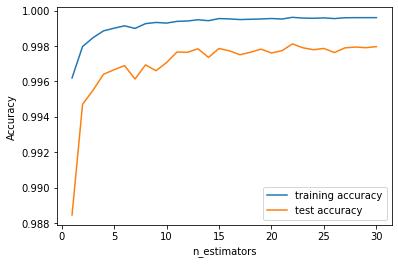

In [77]:
training_accuracy = []
test_accuracy = []
# try n_estimators from 1 to 30
est = range(1, 31)
for n in est:
  # fit the model
  br = BaggingRegressor(n_estimators=n)
  br.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(br.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(br.score(X_test, y_test))

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.plot(est, training_accuracy, label="training accuracy")
plt.plot(est, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

In [78]:
#Supprt Vector machine regression model 
from sklearn.svm import SVR

# instantiate the model 
svr = SVR(kernel='rbf')
# fit the model 
svr.fit(X_train,y_train)

SVR()

In [79]:
#predicting the target value from the model for the samples
y_test_svr = svr.predict(X_test)
y_train_svr = svr.predict(X_train)

In [80]:
#computing the accuracy of the model performance
acc_train_svr = svr.score(X_train, y_train)
acc_test_svr = svr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_svr = np.sqrt(mean_squared_error(y_train, y_train_svr))
rmse_test_svr = np.sqrt(mean_squared_error(y_test, y_test_svr))

print("SVM Regression: Accuracy on training Data: {:.3f}".format(acc_train_svr))
print("SVM Regression: Accuracy on test Data: {:.3f}".format(acc_test_svr))
print('\nSVM Regression: The RMSE of the training set is: ', rmse_train_svr)
print('SVM Regression: The RMSE of the testing set is: ', rmse_test_svr)

SVM Regression: Accuracy on training Data: 0.212
SVM Regression: Accuracy on test Data: 0.207

SVM Regression: The RMSE of the training set is:  8.578995134752958
SVM Regression: The RMSE of the testing set is:  8.36696819232402


In [81]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Support Vector Regression',acc_train_svr, acc_test_svr, rmse_train_svr, rmse_test_svr)

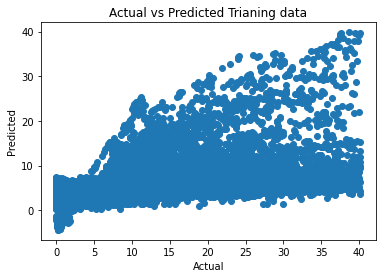

In [82]:
plt.scatter(y_train,y_train_svr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Trianing data");

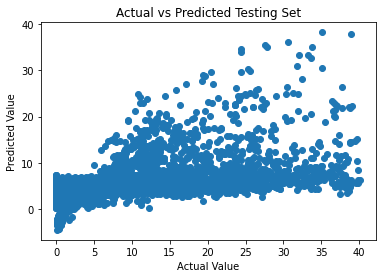

In [83]:
plt.scatter(y_test,y_test_svr)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Testing Set");

#### OBSERVATIONS:

Support Vector Machine Regression gives 20% accuracy which is worst than other regression model. 



In [84]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPRegressor

# instantiate the model
mlp = MLPRegressor(hidden_layer_sizes=([100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=[100, 100])

In [85]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

#### Performance Evaluation:

In [86]:
#computing the accuracy of the model performance
acc_train_mlp = mlp.score(X_train, y_train)
acc_test_mlp = mlp.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_test_mlp))

print("Multilayer Perceptron Regression: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptron Regression: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print('\nMultilayer Perceptron Regression: The RMSE of the training set is: ', rmse_train_mlp)
print('Multilayer Perceptron Regression: The RMSE of the testing set is: ', rmse_test_mlp)

Multilayer Perceptron Regression: Accuracy on training Data: 0.894
Multilayer Perceptron Regression: Accuracy on test Data: 0.902

Multilayer Perceptron Regression: The RMSE of the training set is:  3.1435544496005106
Multilayer Perceptron Regression: The RMSE of the testing set is:  2.9345120777243774


#### Storing Results:

In [87]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptron Regression',acc_train_mlp, acc_test_mlp, rmse_train_mlp, rmse_test_mlp)

In [88]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [89]:
results

ML Model  Train Accuracy  Test Accuracy  \
0                 Linear Regression           0.284          0.274   
1                     Decision Tree           0.976          0.969   
2                     Random Forest           0.991          0.988   
3       Gradient Boosted Regression           0.991          0.988   
4    k-Nearest Neighbors Regression           1.000          0.732   
5                Bagging Regression           0.999          0.997   
6         Support Vector Regression           0.212          0.207   
7  Multilayer Perceptron Regression           0.894          0.902   

   Train RMSE  Test RMSE  
0       8.179      8.006  
1       1.498      1.653  
2       0.903      1.041  
3       0.925      1.031  
4       0.000      4.862  
5       0.240      0.478  
6       8.579      8.367  
7       3.144      2.935

In [90]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False).reset_index(drop=True)

ML Model  Train Accuracy  Test Accuracy  \
0                Bagging Regression           0.999          0.997   
1                     Random Forest           0.991          0.988   
2       Gradient Boosted Regression           0.991          0.988   
3                     Decision Tree           0.976          0.969   
4  Multilayer Perceptron Regression           0.894          0.902   
5    k-Nearest Neighbors Regression           1.000          0.732   
6                 Linear Regression           0.284          0.274   
7         Support Vector Regression           0.212          0.207   

   Train RMSE  Test RMSE  
0       0.240      0.478  
1       0.903      1.041  
2       0.925      1.031  
3       1.498      1.653  
4       3.144      2.935  
5       0.000      4.862  
6       8.179      8.006  
7       8.579      8.367

#### OBSERVATIONS: 
Among all the trained models, Random Forest performance is better. It is understandable because this model is very good in execution Speed & model performance.


### Storing best model :

In [91]:
import pickle

# dump information to that file
pickle.dump(br, open('pickle/model.pkl', 'wb'))

In [92]:
#collecting male suicide rate data
male = stat_data['suicide_rate'][stat_data['gender'] == 1]
print(male.size)
male

11935


0         6.71
1         5.19
3         4.59
4         3.28
8         0.73
         ...  
25763    11.61
25765    11.33
25766    11.10
25767     7.56
25771     2.17
Name: suicide_rate, Length: 11935, dtype: float64

In [93]:
#collecting female suicide rate data
female = stat_data['suicide_rate'][stat_data['gender'] == 0]
print(female.size)
female

13839


2        4.83
5        2.81
6        2.15
7        1.56
9        0.00
         ... 
25768    5.92
25769    2.96
25770    2.58
25772    1.67
25773    1.46
Name: suicide_rate, Length: 13839, dtype: float64

In [94]:
#calculating p value
from scipy import stats
ttest,pval = stats.ttest_rel(male[:11900], female[:11900])

if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


In [95]:
#Creating Contingency Table
contingency_table = pd.crosstab(stat_data.suicide_rate, stat_data.age_group)

In [96]:
#Significance Level 5%
alpha=0.05

In [97]:
chistat, p, dof, expected = stats.chi2_contingency(contingency_table )

In [98]:
#critical_value
critical_value=stats.chi2.ppf(q=1-alpha,df=dof)
print('critical_value:',critical_value)

critical_value: 18257.744744487307


In [99]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chistat)
print('critical_value:',critical_value)
print('p-value:',p) 

Significance level:  0.05
Degree of Freedom:  17945
chi-square statistic: 30342.74275521654
critical_value: 18257.744744487307
p-value: 0.0


In [100]:
#compare chi_square_statistic with critical_value and p-value which is the 
 #probability of getting chi-square>0.09 (chi_square_statistic)
if chistat>=critical_value:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")
    
if p<=alpha:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")


Reject H0,There is a dependency between Age group & Suicide rate.
Reject H0,There is a dependency between Age group & Suicide rate.
